# Import of data

In [1]:
import sys
import os
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split


# Reading data with use of Data Cleaning

In [2]:
module_path = os.path.abspath(os.path.join('..'))
print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path+"\\DataCleaningProgram")
    
from data_loader import DataLoader


dl = DataLoader(coefficient_nulls_removal=50,
                date_column_name=['date'],
                outliers_columns=['channel_2','channel_15','channel_17', 'channel_18',
                                   'channel_20','channel_29','channel_43','channel_45',
                                   'channel_52','channel_57','channel_75','channel_89',
                                   'channel_95','channel_101','channel_111'],
                datetime_duplicated_column_name = ['date_Duplicated'])


X_train_T2 = dl.get_initial_data(input_data_path='C:/Users/Ania/Desktop/Nestle Case/X_train_T2.csv', sep=';', decimal=',')
y_train_T2 = dl.get_initial_data(input_data_path='C:/Users/Ania/Desktop/Nestle Case/y_train_T2.csv', sep=';', decimal=',')
print(f"X_train_T2: {len(X_train_T2)}")
print(X_train_T2.head())
print(y_train_T2.head())

C:\Users\Ania\git\DataScienceProject
X_train_T2: 791
     key       date  channel_2  channel_15  channel_17  channel_18  \
0  10873  01Jan2012   0.000000    0.855201         NaN         NaN   
1  10873  01Feb2012   1.035034   11.774970         NaN         NaN   
2  10873  01Mar2012   0.000000    6.150736         NaN         NaN   
3  10873  01Apr2012   0.000000  154.188243         NaN   67.761324   
4  10873  01May2012   0.000000    4.072811         NaN         NaN   

   channel_20   channel_29   channel_43  channel_45  channel_52   channel_57  \
0    0.562593   102.682690   532.800200    0.000000    0.000000    14.379205   
1   19.115076  1205.408087  5725.402460    0.942431    0.059616   464.512531   
2    3.034532   235.998029    11.597828    0.946789    0.000000   138.271983   
3   84.687752     7.956306    18.029229    0.000000    0.000000   794.104038   
4    0.213474   484.513722    14.587910    0.944704    0.000000  1831.859214   

   channel_75  channel_89  channel_95  channe

In [3]:
data = pd.merge(left=X_train_T2, right=y_train_T2, on=['key', 'date'], how='inner')
print(data)

       key       date  channel_2   channel_15  channel_17   channel_18  \
0    10873  01Jan2012   0.000000     0.855201         NaN          NaN   
1    10873  01Feb2012   1.035034    11.774970         NaN          NaN   
2    10873  01Mar2012   0.000000     6.150736         NaN          NaN   
3    10873  01Apr2012   0.000000   154.188243         NaN    67.761324   
4    10873  01May2012   0.000000     4.072811         NaN          NaN   
..     ...        ...        ...          ...         ...          ...   
786  93876  01Feb2018   0.000000          NaN  324.690145          NaN   
787  93876  01Mar2018   0.204046    -9.292635  347.441412     2.282055   
788  93876  01Apr2018   8.435071     9.597822  384.726601          NaN   
789  93876  01May2018   0.420708  3803.193798  420.850757  1042.765161   
790  93876  01Jun2018   0.000000    35.137764  456.432357    16.780276   

     channel_20   channel_29   channel_43  channel_45  channel_52  \
0      0.562593   102.682690   532.800200 

In [4]:
#Parsing to Datetime
y_train_T2 = dl.parse_dates(y_train_T2)


product_list = pd.unique(y_train_T2['key'])
print(product_list)

#First product
first = product_list[0]


#original set for first product
val_prod_1 = y_train_T2.loc[y_train_T2['key'] == first, 'y'].dropna()




[10873 37081 44612 57423 65101 65919 66606 72802 74523 75309 77390 93876]


In [6]:
#Create train and test sets
x = int(0.8 * val_prod_1.shape[0])
val_prod_1_train = val_prod_1.iloc[:x]
val_prod_1_test = val_prod_1.iloc[x:]
val_prod_1.shape[0] == val_prod_1_train.shape[0] + val_prod_1_test.shape[0]

True

# ===================================

# Making ADF test  

In [7]:
#ADF test for original data
val_prod_1_ADF_test = adfuller(val_prod_1_train)
print('ADF Statistic: %f' % val_prod_1_ADF_test[0])
print('p-value: %f' % val_prod_1_ADF_test[1])

#Hipoteza zerowa dla ADF mówi, że te dane są niestacjonarne, wartości powyżej 0.05 i bisko 1

ADF Statistic: 0.420426
p-value: 0.982243


1      182.843665
2      436.033336
3      582.658260
4     -547.691762
5      599.503685
         ...     
57     291.202980
58      73.709761
59      21.420978
60   -1302.952287
61     798.162816
Name: y, Length: 61, dtype: float64
ADF Statistic: -5.499960
p-value: 0.000002


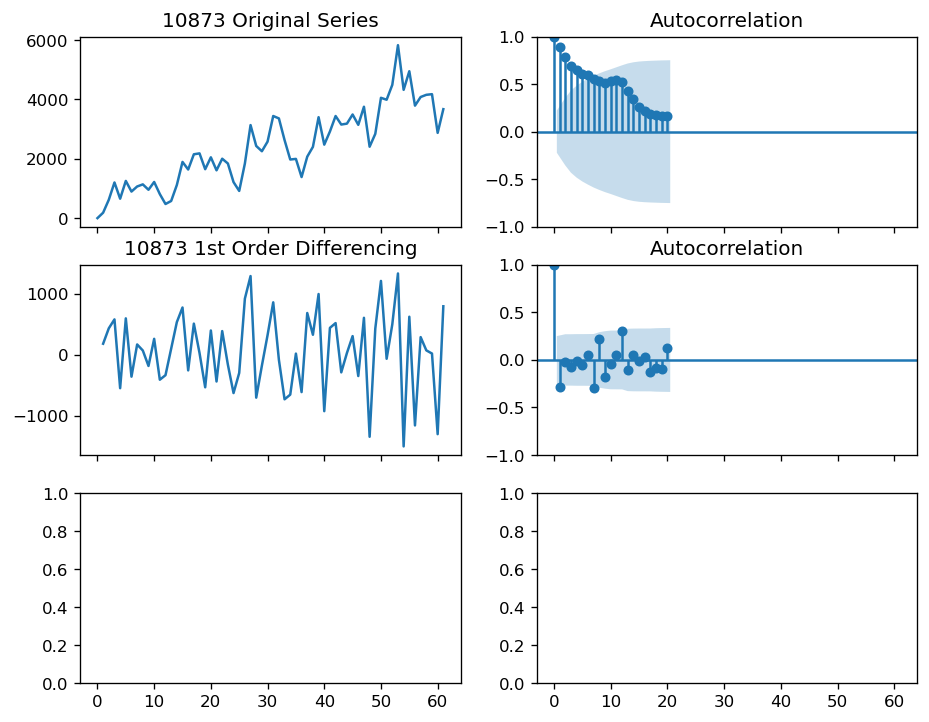

In [8]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(val_prod_1_train); axes[0, 0].set_title('10873 Original Series')
plot_acf(val_prod_1, ax=axes[0, 1], lags=20 )

#set of values for 1st Differencing
val_prod_1_diff_1 = val_prod_1_train.diff().iloc[1:]

# 1st Differencing
axes[1, 0].plot(val_prod_1_diff_1); axes[1, 0].set_title('10873 1st Order Differencing')
plot_acf(val_prod_1_diff_1, ax=axes[1, 1], lags=20)

#check if data is stationary for 1st Differencing
print(val_prod_1_diff_1)
val_prod_1_test_1 = adfuller(val_prod_1_diff_1)
print('ADF Statistic: %f' % val_prod_1_test_1[0])
print('p-value: %f' % val_prod_1_test_1[1])

plt.show()

# Second Differencing

ADF Statistic: -5.692571
p-value: 0.000001


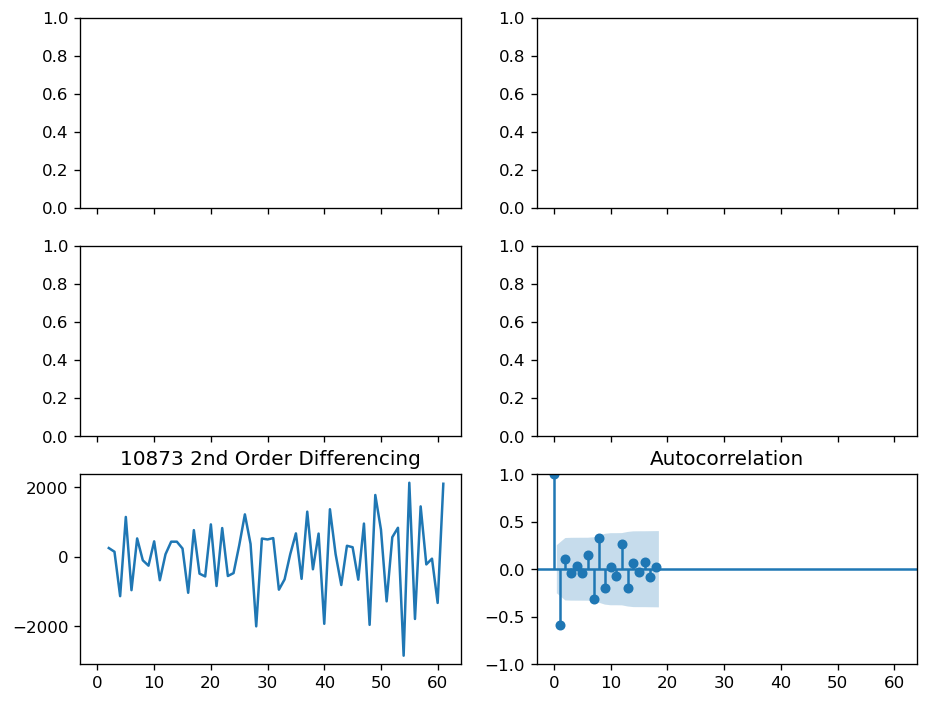

In [9]:
# set of values for 2nd Differencing
val_prod_1_diff_2 = val_prod_1_diff_1.diff().iloc[1:]

fig, axes = plt.subplots(3, 2, sharex=True)
axes[2, 0].plot(val_prod_1_diff_2); axes[2, 0].set_title('10873 2nd Order Differencing')
plot_acf(val_prod_1_diff_2, ax=axes[2, 1])

#check if data is stationary 2dn Differencing
val_prod_1_test_2 = adfuller(val_prod_1_diff_2)
print('ADF Statistic: %f' % val_prod_1_test_2[0])
print('p-value: %f' % val_prod_1_test_2[1])

plt.show()




# Finding paramethers of Arima

C:\Users\Ania\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


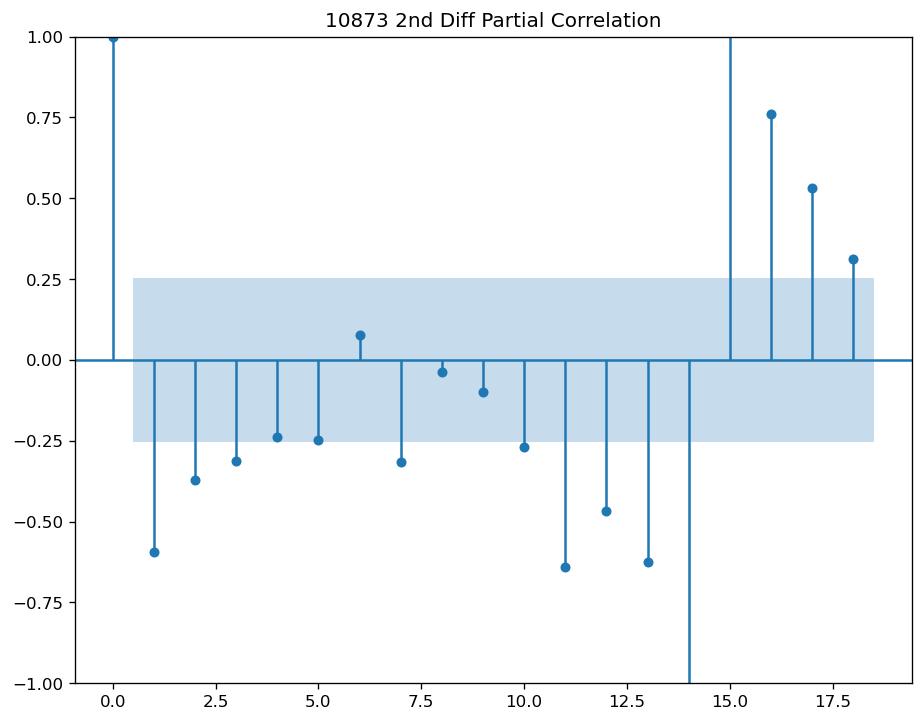

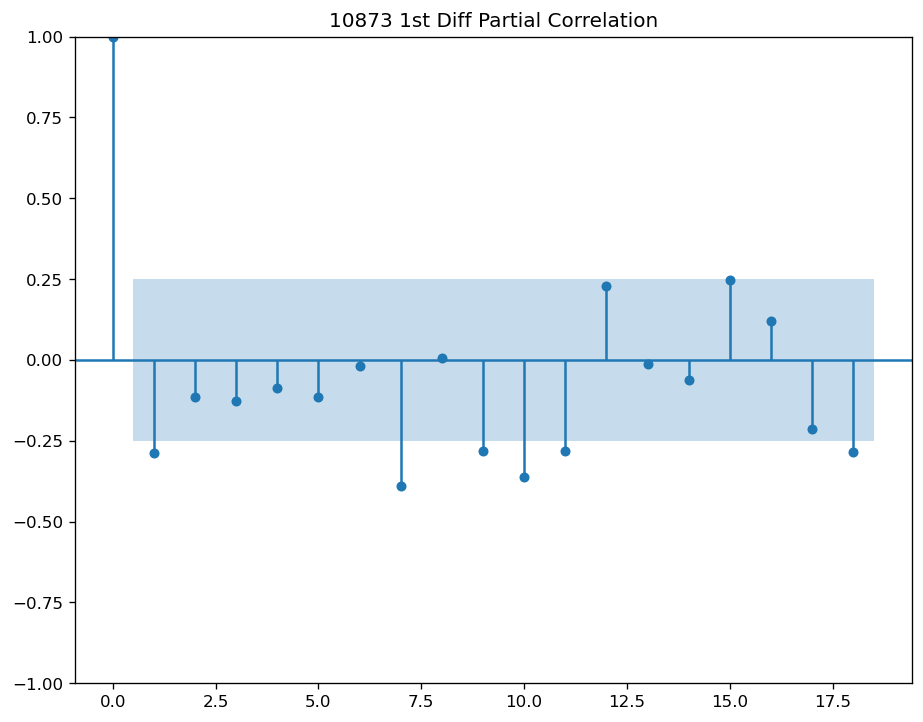

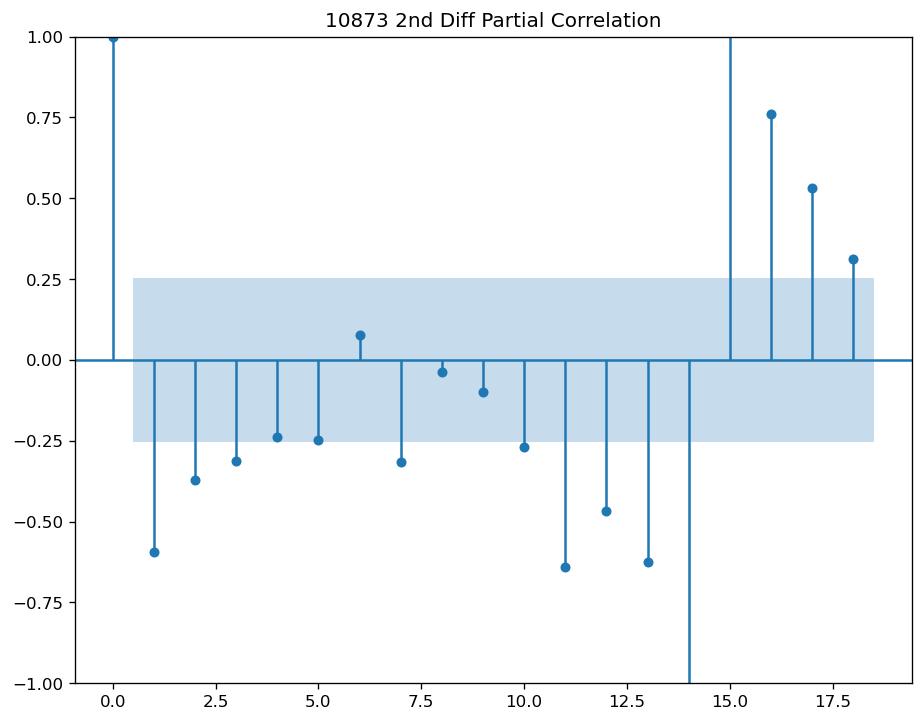

In [10]:
# p is numbers of lags; we take p from partial autocorrelation, we choose valyes which are outside of area of insignificance, 
# meaning the have the highest positive or negative correlation from all values 
#I have chosen 9 as it has the highest correlation of all values
p = 9

# d is a number of times we do differencing, 
#I have chosen 1 as after second differencing data seems over differenced in 2nd round
d = 1

# we take q form autocorrelation an it is a number of values which are outside area of insignificnce (the blue field)
#in autocorrelation for a first differencing we have 2 values totally outside of the blue field
q = 2

#10873 1st Diff Partial Correlation
plot_pacf(val_prod_1_diff_1, title='10873 1st Diff Partial Correlation')

#10873 1st Diff Partial Correlation
plot_pacf(val_prod_1_diff_2, title='10873 2nd Diff Partial Correlation')

# Fit Arima Model

In [11]:
val_prod_1_ARIMA = ARIMA(val_prod_1_train, order=(9,1,2))
val_prod_1_model = val_prod_1_ARIMA.fit()
print(val_prod_1_model.summary())

C:\Users\Ania\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   62
Model:                 ARIMA(9, 1, 2)   Log Likelihood                -470.467
Date:                Fri, 31 Mar 2023   AIC                            964.934
Time:                        15:13:23   BIC                            990.265
Sample:                             0   HQIC                           974.862
                                 - 62                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3682      0.402      0.917      0.359      -0.419       1.155
ar.L2         -0.4368      0.304     -1.435      0.151      -1.033       0.160
ar.L3         -0.2532      0.216     -1.174      0.2

# Forecast and Plot

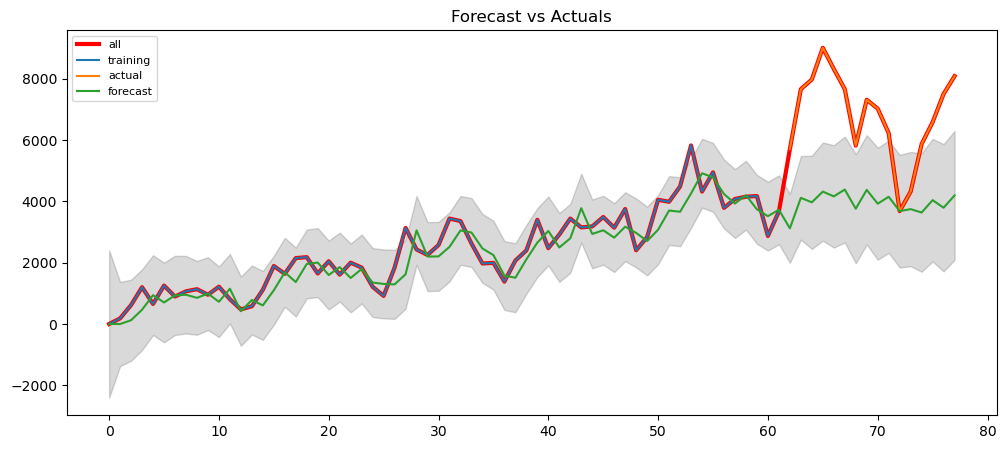

In [13]:
# Forecast
val_prod_1_forecast_conf = val_prod_1_model.get_prediction(start = 0, end = val_prod_1_train.shape[0] + 15)  # 95% conf

# Confidence intervals (all data within 95%)
lower_series = val_prod_1_forecast_conf.conf_int()['lower y']
upper_series = val_prod_1_forecast_conf.conf_int()['upper y']

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(val_prod_1.index, val_prod_1, label='all', lw=3, color='r')
plt.plot(val_prod_1_train.index, val_prod_1_train, label='training') #brakuje osi iksów, trzeba dopisać
plt.plot(val_prod_1_test.index, val_prod_1_test, label='actual')
plt.plot(val_prod_1_forecast_conf.predicted_mean, label='forecast')
plt.fill_between(lower_series.index, lower_series.values, upper_series.values, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()